# The first step is to import the required Librairies

In [1]:
"""pandas is a Python package that provides fast, flexible, and expressive data structures
designed to make working with "relational" or "labeled" data both easy and intuitive."""
import pandas as pd
"""NumPy is a Python library used for working with arrays.
It also has functions for working in domain of linear algebra, fourier transform, and matrices."""
import numpy as np

"""Matplotlib is a comprehensive library for creating static, animated, and interactive
visualizations in Python. Matplotlib makes easy things easy and hard things possible."""
import  matplotlib.pyplot as plt 
"""OpenCV is the huge open-source library for the computer vision, machine learning, and image 
processing and now it plays a major role in real-time operation which is very important
in today’s systems"""
import cv2
"""This module provides a portable way of using operating system dependent functionality. If you
just want to read or write a file see open(), if you want to manipulate paths, see the os.path 
module, and if you want to read all the lines in all the files on the command line see the 
fileinput module"""
import os
"""The Python Imaging Library adds image processing capabilities to your Python interpreter.
This library provides extensive file format support, an efficient internal representation, 
and fairly powerful image processing capabilities."""
from PIL import Image
"""scikit-learn is a Python module for machine learning built on top of SciPy and is distributed
under the 3-Clause BSD license."""
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import itertools
"""Tensorflow is one of the most-used deep-learning frameworks. It’s arguably the most popular
machine learning platform on the web, with a broad range of users from those just starting out, 
to people looking for an edge in their careers and businesses. """
import tensorflow as tf 
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense ,Flatten,Dropout
print('the cell was executed without errors')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg19 import   VGG19
#from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

the cell was executed without errors


# We are going to load our Dataset

In [2]:
Path_Data=r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\data\processed"
Data=pd.read_csv(os.path.join(Path_Data,"Data.csv")) 



In [3]:
data_path=r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\data\raw\AMHCD_64"
categories=os.listdir(data_path)
print(categories)
number_Classes=len(categories)
print(number_Classes)

['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
33


In [4]:
from sklearn.model_selection import train_test_split
Train, Validation = train_test_split(Data, test_size = 0.3, random_state = 20)


train_datagen = ImageDataGenerator( rescale=1./255)
print('the cell was executed without errors')
Train


the cell was executed without errors


,Path,Classes
18692,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yat
22295,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yaz
18625,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yat
13017,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yam
8869,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yahh
...,...,...
14729,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yaq
23452,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yey
23775,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yey
4367,C:\Users\kabir\Desktop\Projects\Amazigh_handwr...,yae


In [5]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=Train,
directory=data_path,
x_col='Path',
y_col='Classes',
batch_size=128,
seed=42,
shuffle=False,
class_mode="categorical",
#class_mode="sparse",

target_size=(64,64))


Found 18018 validated image filenames belonging to 33 classes.


In [6]:
validation_generator=train_datagen.flow_from_dataframe(
dataframe=Validation,
directory=data_path,
x_col='Path',
y_col='Classes',
batch_size=128,
seed=42,
shuffle=False,
class_mode="categorical",

#class_mode="sparse",
target_size=(64,64))

print('the cell was executed without errors')

Found 7722 validated image filenames belonging to 33 classes.
the cell was executed without errors


In [7]:
img_input=(64, 64, 3)
vgg=VGG16(weights='imagenet', include_top=False,pooling='avg', input_shape=img_input)
for layer in vgg.layers:
    layer.trainable = False
x = vgg.output
x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)
x = Flatten(name="flatten")(x)
x = Dense(2048, activation='relu')(x)
prd = Dense(number_Classes,activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prd)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [8]:
Path_Weights=r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\models\CNN"
#//checking checkpoint for selecting the best model for the emotion detection and save the best model with minimum validation loss having the name written on it in the current working folder
checkpoint = ModelCheckpoint("Weight_VGG16_2.h5",
                             save_weights_only=True,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

#//reduce_lr will also monitor the validation loss 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode="min",
                              factor=0.1,
                              patience=2,
                              verbose=1,
                              min_lr=.000001)
#callb = [earlystop, checkpoint, reduce_lr]

call=[ checkpoint,reduce_lr]

In [9]:
adam = Adam(learning_rate=.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [10]:
s=train_generator.n/16
print(s)

1126.125


In [11]:

batch_size=512
#//This last block of codes will train our codes with the given parameters where it will fit train generator for training epochs to 25, callbacks will call the earlystop, checkpoint and reduce_lr and validation data will be equal to validation generator which was created on the first execution 
history = model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n/batch_size, epochs=200
                              ,validation_data=validation_generator,validation_steps=validation_generator.n/batch_size)

Epoch 1/200


C:\Users\kabir\AppData\Local\Temp\ipykernel_3688\1632587513.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n/batch_size, epochs=200


35/35 [==============================] - 7s 68ms/step - loss: 3.4278 - accuracy: 0.0833 - val_loss: 3.3077 - val_accuracy: 0.2402
Epoch 2/200
35/35 [==============================] - 4s 61ms/step - loss: 3.1939 - accuracy: 0.2311 - val_loss: 2.9843 - val_accuracy: 0.4624
Epoch 3/200
35/35 [==============================] - 2s 62ms/step - loss: 2.8337 - accuracy: 0.3571 - val_loss: 2.5297 - val_accuracy: 0.5444
Epoch 4/200
35/35 [==============================] - 2s 65ms/step - loss: 2.4226 - accuracy: 0.4130 - val_loss: 2.0911 - val_accuracy: 0.6406
Epoch 5/200
35/35 [==============================] - 2s 64ms/step - loss: 2.0646 - accuracy: 0.4941 - val_loss: 1.7351 - val_accuracy: 0.6953
Epoch 6/200
35/35 [==============================] - 2s 63ms/step - loss: 1.7759 - accuracy: 0.5293 - val_loss: 1.4538 - val_accuracy: 0.7715
Epoch 7/200
35/35 [==============================] - 2s 64ms/step - loss: 1.5534 - accuracy: 0.5781 - val_loss: 1.2297 - val_accuracy: 0.8101
Epoch 8/200
35/35 

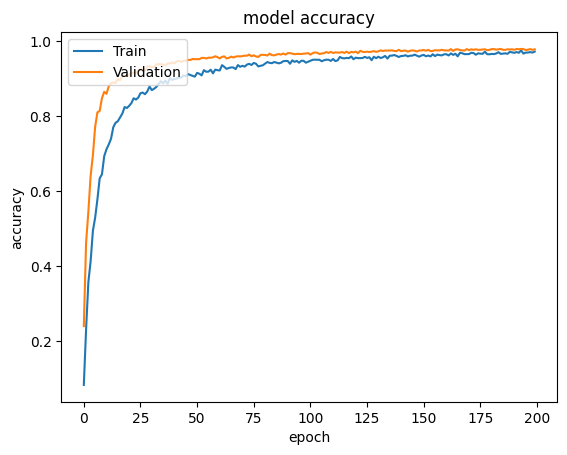

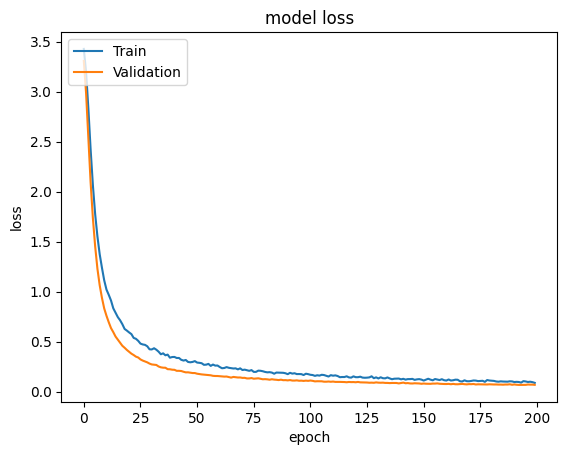

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\src\visualization\VGG16\Accuracy_VGG16_1.png")

plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\src\visualization\VGG16\Loss_VGG16_1.png")

plt.show()

In [17]:
Path_model=r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\models\VGG16"
model.save(os.path.join(Path_model,"Amazigh_Handwritten_Recognition_VGG16_2.h5"))

In [ ]:
from keras.models import load_model
#from sklearn.metrics import confusion_matrix


model = load_model(os.path.join(Path_model,"Amazigh_Handwritten_Recognition_VGG16_2.h5"))

In [13]:

# Predict the test data using the trained model
y_pred = model.predict(validation_generator)



61/61 [==============================] - 4s 62ms/step


In [14]:
from mlxtend.evaluate import confusion_matrix

#Confution Matrix and Classification Report
target_names = ['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj',
                'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw',
                'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
#print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
conf_matrix=confusion_matrix(validation_generator.classes, y_pred)
print(conf_matrix)


Confusion Matrix
[[244   0   0 ...   0   0   0]
 [  0 226   0 ...   0   0   0]
 [  0   1 224 ...   0   0   1]
 ...
 [  0   0   0 ... 213   0   3]
 [  0   0   0 ...   1 216   0]
 [  0   0   1 ...   3   0 229]]


In [15]:
from sklearn.metrics import classification_report

print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Classification Report
              precision    recall  f1-score   support

          ya       1.00      1.00      1.00       244
         yab       1.00      0.99      0.99       228
        yach       0.99      0.99      0.99       226
         yad       0.98      0.99      0.98       238
        yadd       0.96      0.96      0.96       245
         yae       1.00      0.99      1.00       243
         yaf       0.98      0.99      0.98       217
         yag       0.99      0.99      0.99       221
        yagh       0.98      0.98      0.98       237
        yagw       0.98      0.96      0.97       240
         yah       0.99      0.99      0.99       245
        yahh       0.98      0.97      0.98       240
         yaj       0.99      0.99      0.99       225
         yak       0.99      0.96      0.98       227
        yakw       0.96      0.99      0.97       244
         yal       0.98      0.98      0.98       245
         yam       0.98      0.99      0.98       254
     

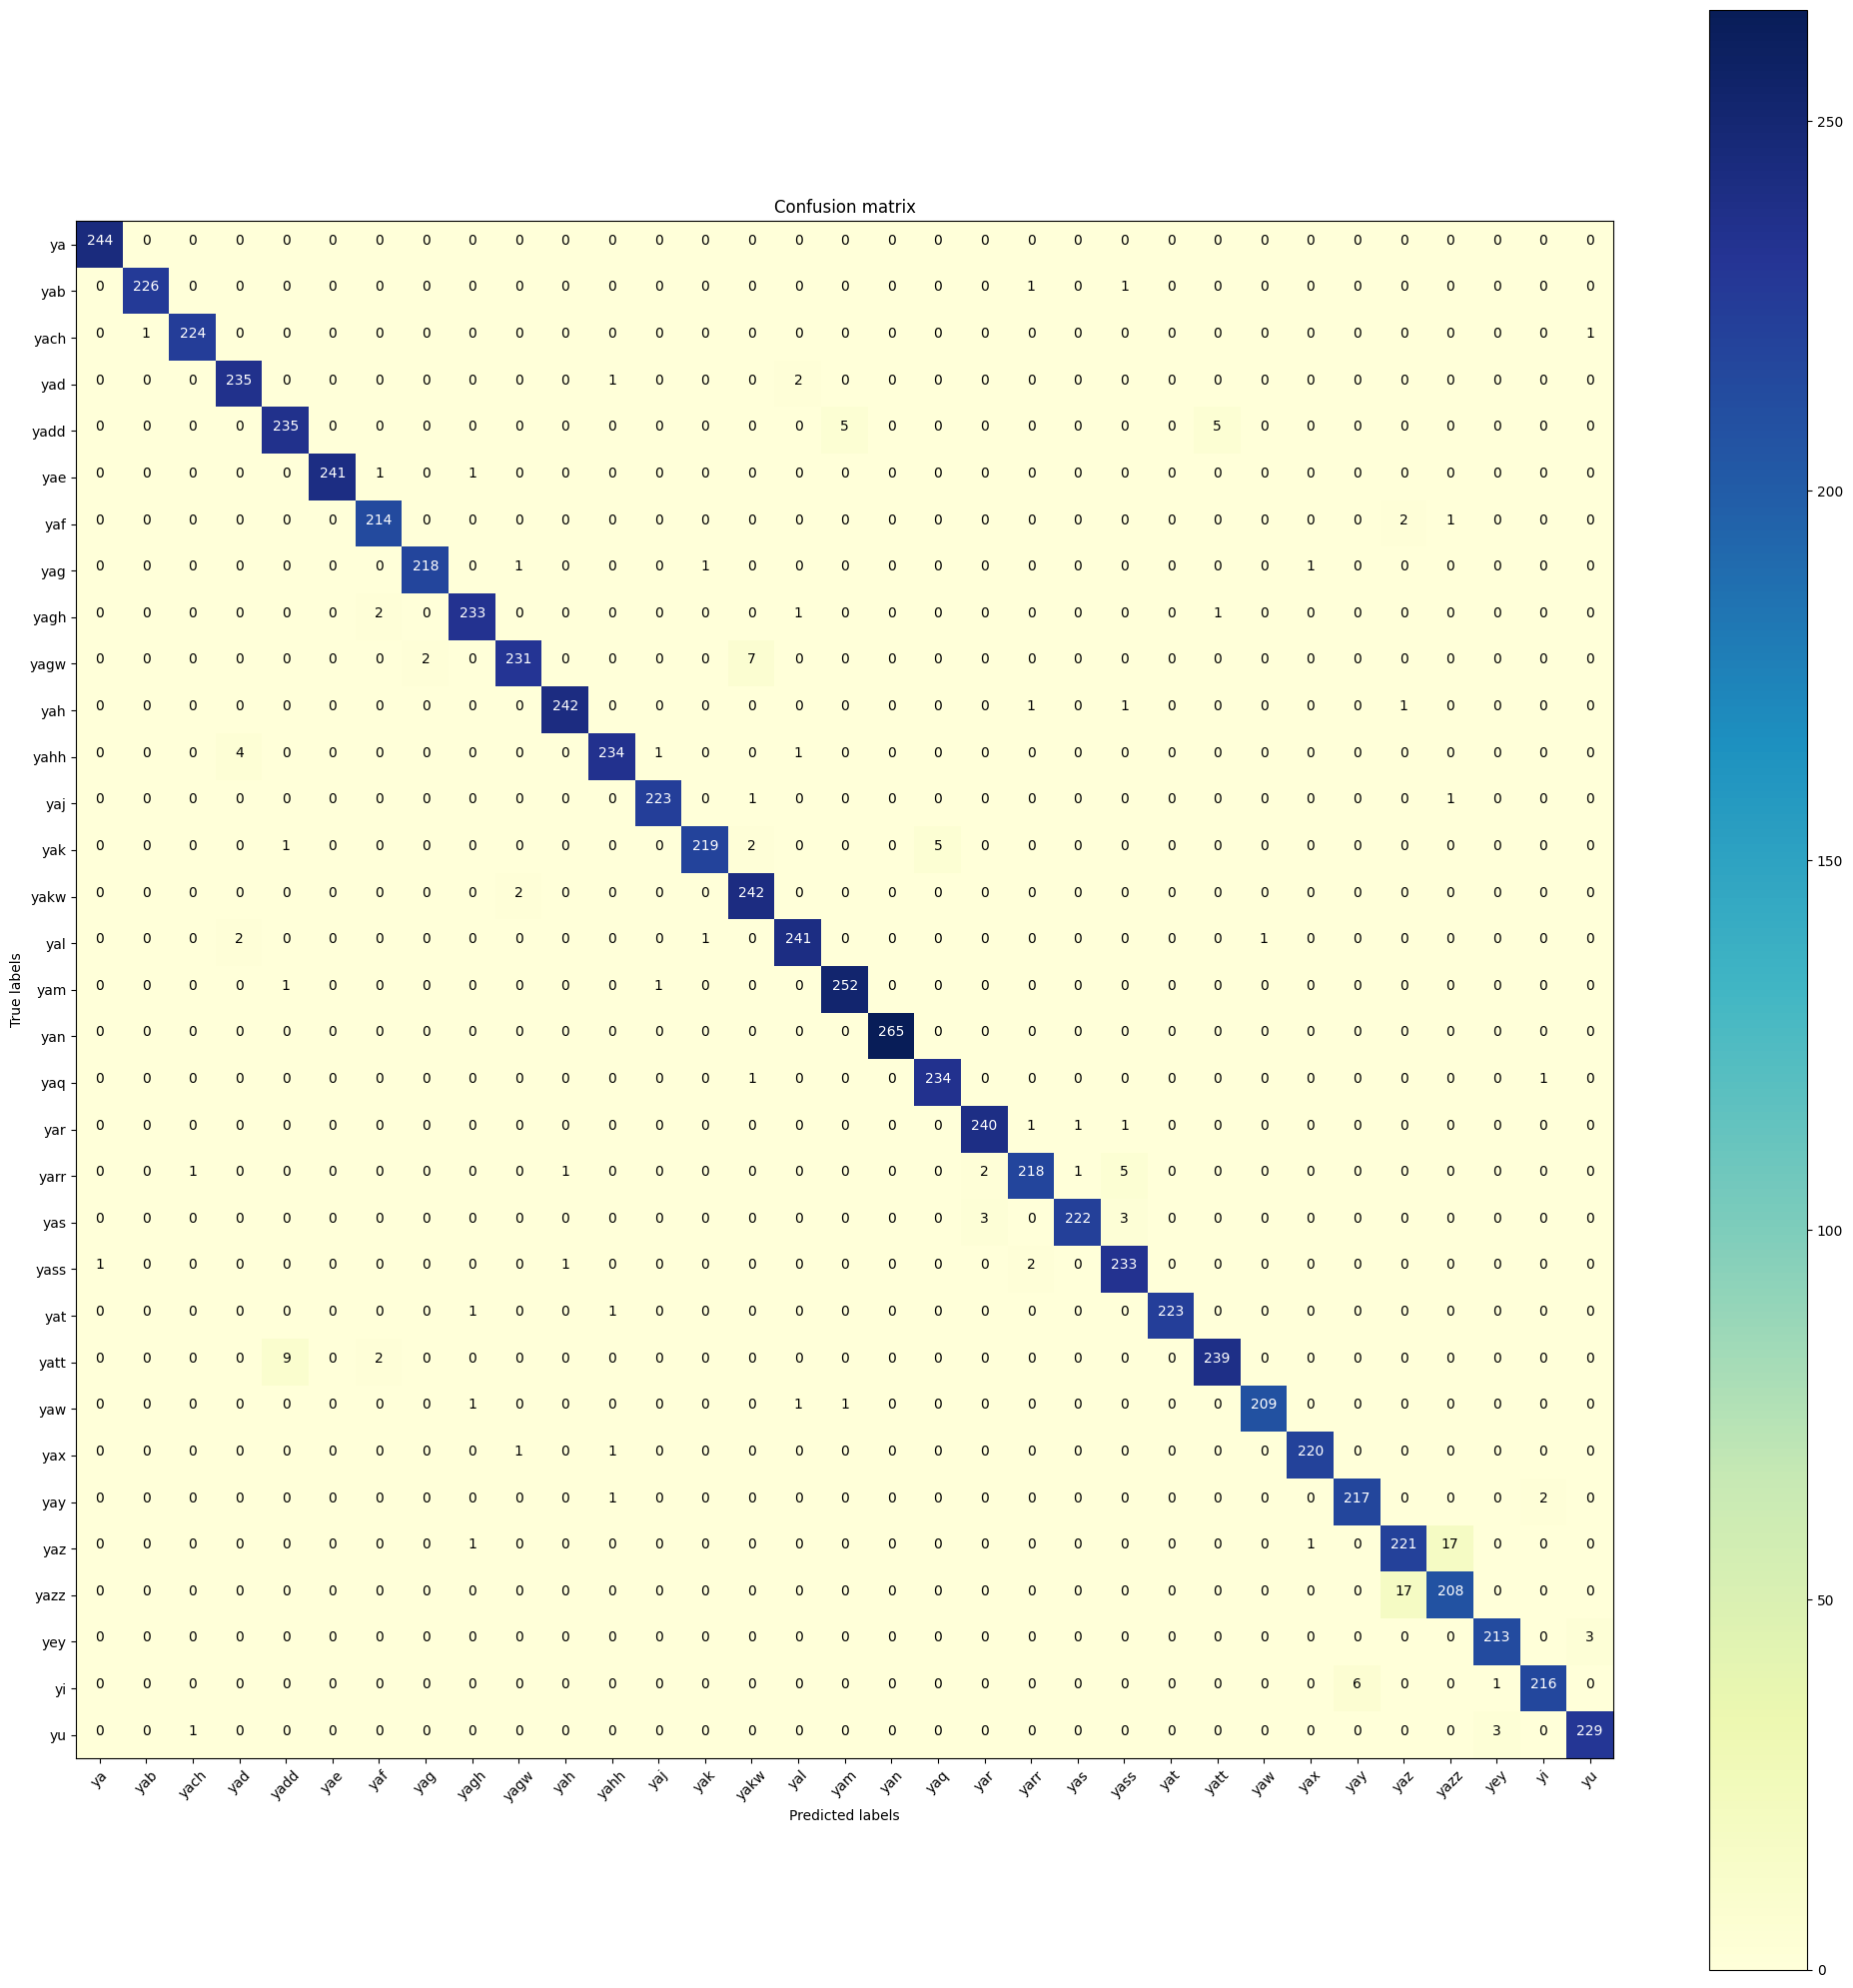

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('YlGnBu')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    #plt.savefig(r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\src\visualization\CNN\Loss_3.png")
    plt.savefig(r"C:\Users\kabir\Desktop\Projects\Amazigh_handwritten_character_recognition\src\visualization\VGG16\Confusion_matrix_VGG16_2.png", dpi=500, bbox_inches = 'tight')
    plt.show()
    
plot_confusion_matrix(conf_matrix, target_names)